## Bank marketing by predicting

###    1. Import and warehouse data 
      a. Import all the given datasets and explore shape and size of each.
      b. Merge all datasets onto one and explore final shape and size.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [27]:
df_1 = pd.read_csv('Part2+-+Data1.csv')
df_2 = pd.read_csv('Part2+-Data2.csv')
df_1.head(4)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2


In [28]:
df_1.shape

(5000, 8)

In [29]:
df_2.head(4)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN


In [30]:
df_2.shape

(5000, 7)

In [31]:
# Since both the data have ID as a common attribute, the merge will be done on ID
df = pd.merge(df_1,df_2,left_on ="ID",right_on="ID")

In [32]:
df.shape

(5000, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


##    2. Data cleansing:
      a. Explore and if required correct the datatypes of each attribute
      b. Explore for null values in the attributes and if required drop or impute values

In [34]:
# Checking the missing 20 values in loanOnCard column 
df['LoanOnCard'].unique()

array([nan,  1.,  0.])

In [35]:
df.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [36]:
# Since the 20 values in LoanOnCard is not mentioned, It is better to drop those column
df = df.dropna(axis=0)

# Id and Zipcode can be droped as it has no major contribution in the analysis
df = df.drop(['ID','ZipCode'],axis=1)

# Cross checking the above funtions is applied or not
df.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

##    3. Data analysis & visualisation:
        a. Perform detailed statistical analysis on the data.
        b. Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4980 non-null   int64  
 1   CustomerSince        4980 non-null   int64  
 2   HighestSpend         4980 non-null   int64  
 3   HiddenScore          4980 non-null   int64  
 4   MonthlyAverageSpend  4980 non-null   float64
 5   Level                4980 non-null   int64  
 6   Mortgage             4980 non-null   int64  
 7   Security             4980 non-null   int64  
 8   FixedDepositAccount  4980 non-null   int64  
 9   InternetBanking      4980 non-null   int64  
 10  CreditCard           4980 non-null   int64  
 11  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 505.8 KB


In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4980.0,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.0,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.0,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0
Security,4980.0,0.104418,0.305832,0.0,0.0,0.0,0.000,1.0
FixedDepositAccount,4980.0,0.060643,0.238697,0.0,0.0,0.0,0.000,1.0
InternetBanking,4980.0,0.597189,0.490513,0.0,0.0,1.0,1.000,1.0


<AxesSubplot:>

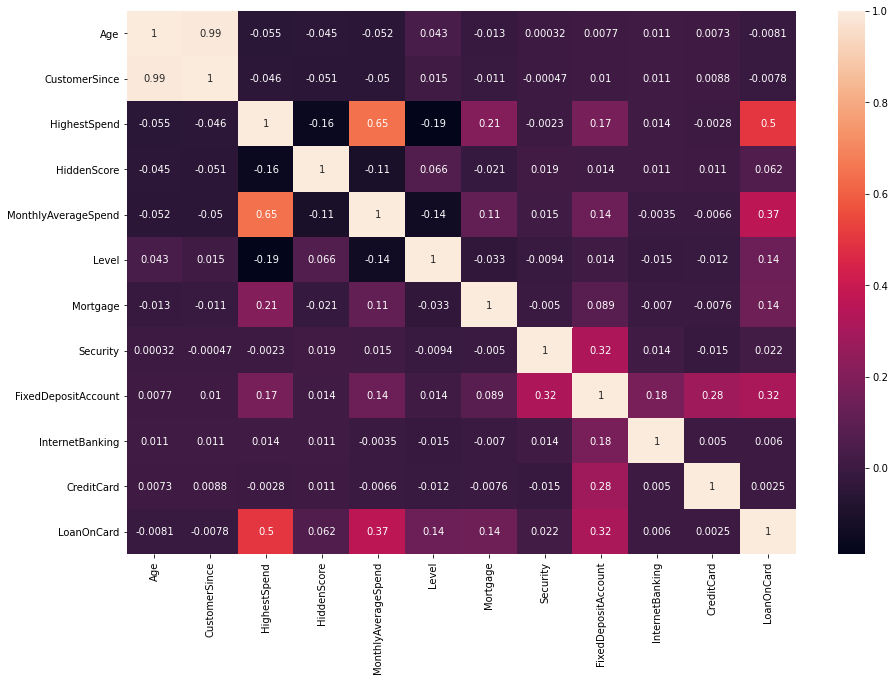

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

    By the above Heat-map we can see that LoanOnCard has relation with the HighestSpent, followed by FixedDepositAccount, MonthlyAverageSpend. For better analysis of the data lets look at the countplot.

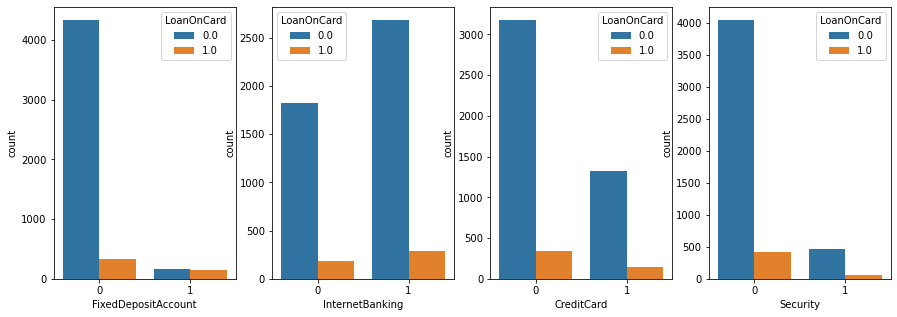

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
ax2=sns.countplot(x="FixedDepositAccount",hue="LoanOnCard",data=df)
plt.subplot(1,4,2)
ax3=sns.countplot(x='InternetBanking',hue="LoanOnCard",data=df)
plt.subplot(1,4,3)
ax4=sns.countplot(x='CreditCard',hue="LoanOnCard",data=df)
plt.subplot(1,4,4)
ax5=sns.countplot(x='Security',hue="LoanOnCard",data=df)

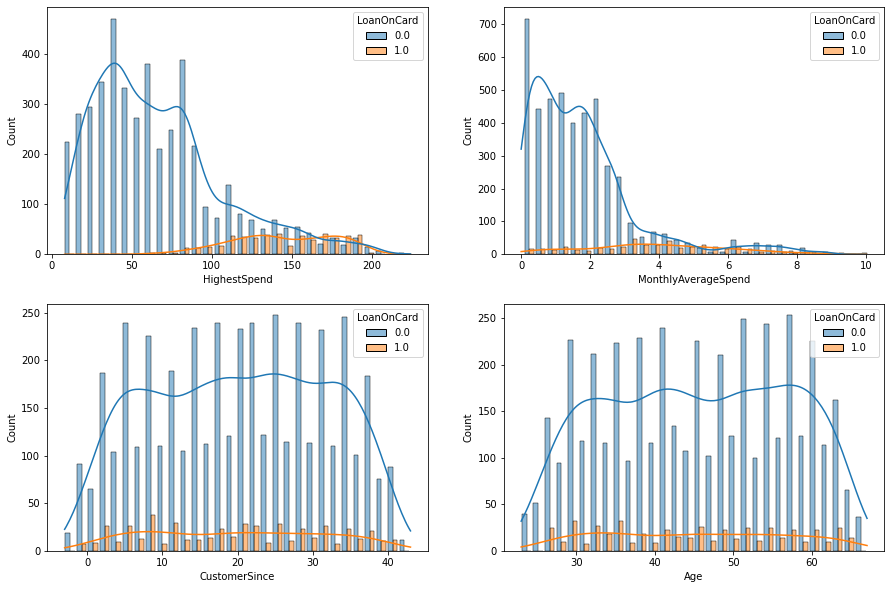

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax1 = sns.histplot(data=df, x="HighestSpend",kde=True , hue="LoanOnCard",bins=30, multiple="dodge", shrink=.8)
plt.subplot(2,2,2)
ax2 = sns.histplot(data=df, x="MonthlyAverageSpend",kde=True , hue="LoanOnCard",bins=30, multiple="dodge", shrink=.8)
plt.subplot(2,2,3)
ax3 = sns.histplot(data=df, x="CustomerSince",kde=True , hue="LoanOnCard",bins=30, multiple="dodge", shrink=.8)
plt.subplot(2,2,4)
ax4 = sns.histplot(data=df, x="Age", hue="LoanOnCard",kde=True, bins=30, multiple="dodge", shrink=.8)

### From the above plots we can have an obsevation as follows:
    
    * Customers who have LoanOnCard, majority of them have FixedDepositAccount
    * Customers who has InternetBanking, need not to have LoanOnCard but have an observation that those who have InternetBanking may have more probability to have LoanOnCard
    * Customers who dont have CreditCard and Security may potential target for LoanOnCard
    * Customers who have HighestSpend of above 110 and MonthlyAverageSpend of above 3, are the most favourable target for LaonOnCard
    * Customers of any Age or CustomerSince do not matter, all are equally a potential target for LoanOnCard
    * In Conclusion, LoanOnCard is directly proportional to FixedDepositAccount, InternetBanking, HighestSpend and MonthlyAverageSpend. Inversly proportional to CreditCard and Security. Age and CustomerSince donot make any diffence in this data analysis.

### 4. Data pre-processing:
    a. Segregate predictors vs target attributes
    b. Check for target balancing and fix it if found imbalanced.
    c. Perform train-test split

In [42]:
# Droping Age and CustomerSince

df = df.drop(['CustomerSince','Age'],axis=1)
df.head()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,180,1,8.9,3,0,0,0,0,0,1.0
10,105,4,2.4,3,0,0,0,0,0,0.0
11,45,3,0.1,2,0,0,0,1,0,0.0
12,114,2,3.8,3,0,1,0,0,0,0.0
13,40,4,2.5,2,0,0,0,1,0,0.0


In [43]:
# Segregating predictors and target attributes
X = df.loc[:,:"CreditCard"]
y = df[["LoanOnCard"]]

#Standardization of data

X_std=pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns=X.columns

#Splitting data into train dataset and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=42,shuffle=True) 

## 5. Model training, testing and tuning:
    a. Design and train a Logistic regression and Naive Bayes classifiers.
    b. Display the classification accuracies for train and test data.
    c. Display and explain the classification report in detail.
    d. Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained          model with your comments for selecting this model. 

Classification : LogisticRegression
Accuracy : 0.9437751004016064
Recall Score : 0.625
Precison Score : 0.75
F1 Score : 0.682

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1350
         1.0       0.75      0.62      0.68       144

    accuracy                           0.94      1494
   macro avg       0.86      0.80      0.83      1494
weighted avg       0.94      0.94      0.94      1494



[Text(0, 0.5, 'No Loan'), Text(0, 1.5, 'Loan')]

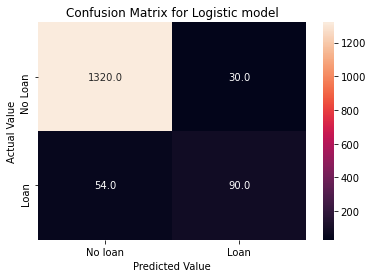

In [44]:
#LG
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train.values.ravel())
y_pred=lr.predict(X_test)
print(f"Classification : {lr.__class__.__name__}")
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f'Recall Score : {np.round(recall_score(y_test,y_pred),3)}')
print(f'Precison Score : {np.round(precision_score(y_test,y_pred),3)}',)
print(f'F1 Score : {np.round(f1_score(y_test,y_pred),3)}\n',)
print(f'Classification Report : \n{classification_report(y_test,y_pred)}')

matrix=confusion_matrix(y_test,y_pred);

ax=plt.subplot();
sns.heatmap(matrix,annot=True,fmt=".1f");
ax.set_title('Confusion Matrix for Logistic model')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.xaxis.set_ticklabels(['No loan','Loan'])
ax.yaxis.set_ticklabels(['No Loan','Loan'])

Classification : LogisticRegression
Accuracy : 0.8708165997322623
Recall Score : 0.597
Precison Score : 0.389
F1 Score : 0.471

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      1350
         1.0       0.39      0.60      0.47       144

    accuracy                           0.87      1494
   macro avg       0.67      0.75      0.70      1494
weighted avg       0.90      0.87      0.88      1494



[Text(0, 0.5, 'No Loan'), Text(0, 1.5, 'Loan')]

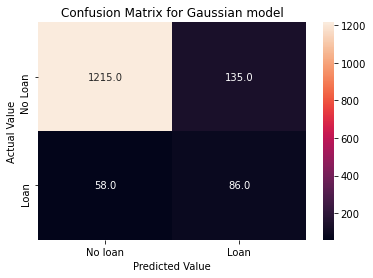

In [45]:
#Naive Bayes Model

gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(f"Classification : {lr.__class__.__name__}")
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f'Recall Score : {np.round(recall_score(y_test,y_pred),3)}')
print(f'Precison Score : {np.round(precision_score(y_test,y_pred),3)}',)
print(f'F1 Score : {np.round(f1_score(y_test,y_pred),3)}\n',)
print(f'Classification Report : \n{classification_report(y_test,y_pred)}')

matrix=confusion_matrix(y_test,y_pred);

ax=plt.subplot();
sns.heatmap(matrix,annot=True,fmt=".1f");
ax.set_title('Confusion Matrix for Gaussian model')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.xaxis.set_ticklabels(['No loan','Loan'])
ax.yaxis.set_ticklabels(['No Loan','Loan'])

    From the above Models we can conclude that LogisticRegression gives more accurate predictions.

## 6. Conclusion and Improvement:
    a. Write your conclusion on the results.
    b. Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the 
    bank to perform a better data analysis in future<br>
#### Conclusion
    * To predict the Target advertisement customers, LogisticRegression model is recommended. It has most of the predicting parameters results high such as Accuracy, Precision and recall.
#### Improvement
    * Many parameters as Age, Sugar, BP, Blood Group and other essential parameter can be halpful.
    